In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.tsa.holtwinters import SimpleExpSmoothing  ##SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt  ## Holt's r DoubleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  ##Winter's Smoothing


In [15]:
coke=pd.read_excel('H:\\Documents\\CocaCola_Sales_Rawdata.xlsx')

In [16]:
coke.sample()

,Quarter,Sales
6,Q3_87,2014.36


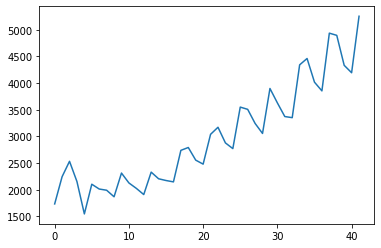

In [17]:
## Centering moving average for the time series
coke.Sales.plot(label="org")

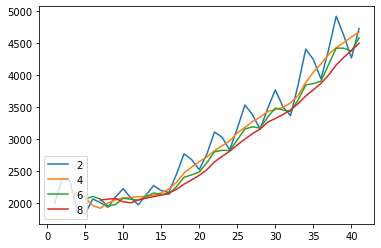

In [18]:
for i in range(2,9,2):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)

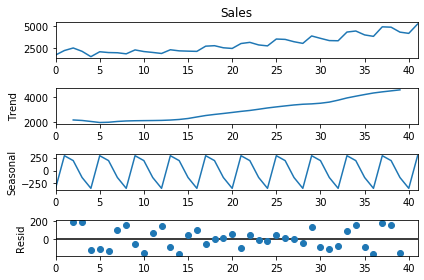

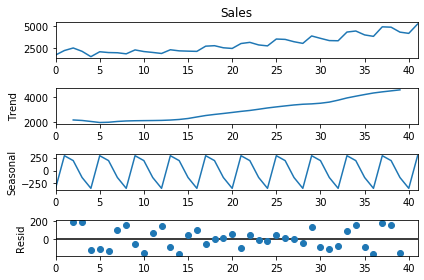

In [19]:
## Time Series decomposition plot

decompose_ts_add=seasonal_decompose(coke.Sales, model="additive",period=4)
decompose_ts_add.plot()

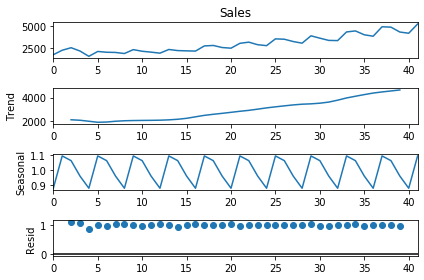

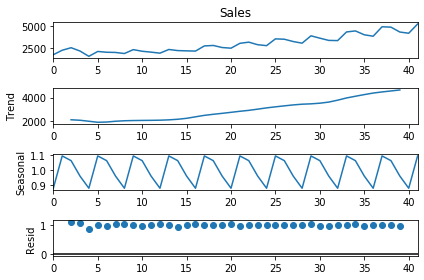

In [20]:
decompose_ts_mul=seasonal_decompose(coke.Sales,model="multiplicative", period=4)
decompose_ts_mul.plot()

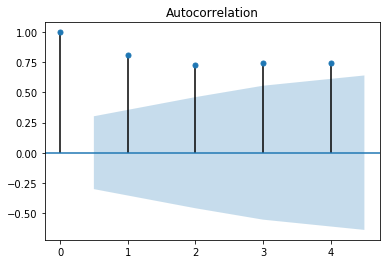

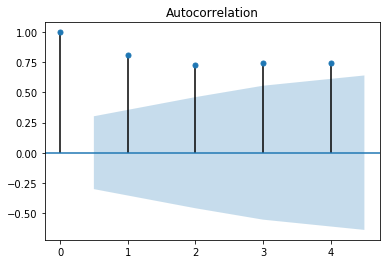

In [21]:
### ACF plot on Original datasets
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales, lags=4)

In [22]:
### Splitting Testdata & train data

train=coke.head(38)
test=coke.tail(4)

In [23]:
## creating MAPPE Function to calculate MAPE values for Test data

def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [26]:
## Simple Exponential Method

ses_model=SimpleExpSmoothing(train['Sales']).fit()
pred_ses=ses_model.predict(start=test.index[0], end=test.index[-1], )
MAPE(pred_ses, test.Sales)

8.272015757292301

In [28]:
### Holt's Method

holt_model=Holt(train['Sales']).fit()
pred_holt=holt_model.predict(start=test.index[0], end=test.index[-1])
MAPE(pred_holt,test.Sales)

C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


8.820752040207246

In [31]:
### Holt's winter Exponential smoothing with additive seasonality and additive trend(linear)

hw_model_add_add=ExponentialSmoothing(train["Sales"], seasonal="add", trend="add", seasonal_periods=4).fit()
pred_hw_add_add=hw_model_add_add.predict(start=test.index[0], end=test.index[-1])
MAPE(pred_hw_add_add, test.Sales)

C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


1.5209484247132166

In [32]:
### Holt's winter Exponential smoothing with Multiplicative seasonality and additive trend(linear)

hw_model_mul_add=ExponentialSmoothing(train["Sales"], seasonal="mul", trend="add", seasonal_periods=4).fit()
pred_hw_mul_add=hw_model_mul_add.predict(start=test.index[0], end=test.index[-1])
MAPE(pred_hw_mul_add, test.Sales)


1.778138597655892

In [34]:
#### Final Model on 100% data-- Holt's Winter Multi Seasonality & add trend is better

hwe_model_add_add=ExponentialSmoothing(coke["Sales"], seasonal="add", trend="add",seasonal_periods=4).fit()

C:\Users\ms012t\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [35]:
### Load the new data which includes the entry for future 4 values

new_data=pd.read_excel('H:\\Documents\\Newdata_CocaCola_Sales.xlsx')

In [36]:
newdata_pred=hwe_model_add_add.predict(start= new_data.index[0], end= new_data.index[-1])
newdata_pred

0     1753.846492
1     2243.084132
2     2513.897939
3     2278.417611
4     1715.024421
5     2140.769845
6     2387.625878
7     1864.840609
8     1345.887031
9     2140.161369
10    2296.330586
11    2198.132340
12    1822.043303
13    2228.100753
14    2141.257380
15    2139.273691
16    2020.138088
17    2471.811536
18    2459.240746
19    2594.223455
20    2546.495111
21    3036.852851
22    2973.608852
23    2837.353730
24    2816.245936
25    3368.799826
26    3518.511738
27    3215.468443
28    3147.267244
29    3823.751960
30    3816.046258
31    3455.104447
32    3252.730179
33    4099.156989
34    4004.803561
35    4008.448316
36    4002.835373
37    4872.774756
38    4859.696935
39    4423.871147
40    4274.966908
41    5294.875498
42    5211.819054
43    4672.347264
44    4557.678927
45    5655.842485
dtype: float64